Import necessery pacakge 

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EDA 

Data set loading from data folder 

In [11]:

# Correct path to load the dataset from the 'data' folder
df = pd.read_csv(r'C:\Users\abdu\garment_productivity_prediction\data\garments_worker_productivity.csv')

# Display the first few rows of the dataset to inspect
df.head()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Data summerization 

In [12]:
# Summarize the data
df.info()

# Show the first few rowsof the data sets
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Basic statics 

In [13]:
# Get basic statistics for numeric columns
df.describe()


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [37]:
# Get value counts for the 'department' column
df['department'].value_counts()


department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

Relationship and pattern in data

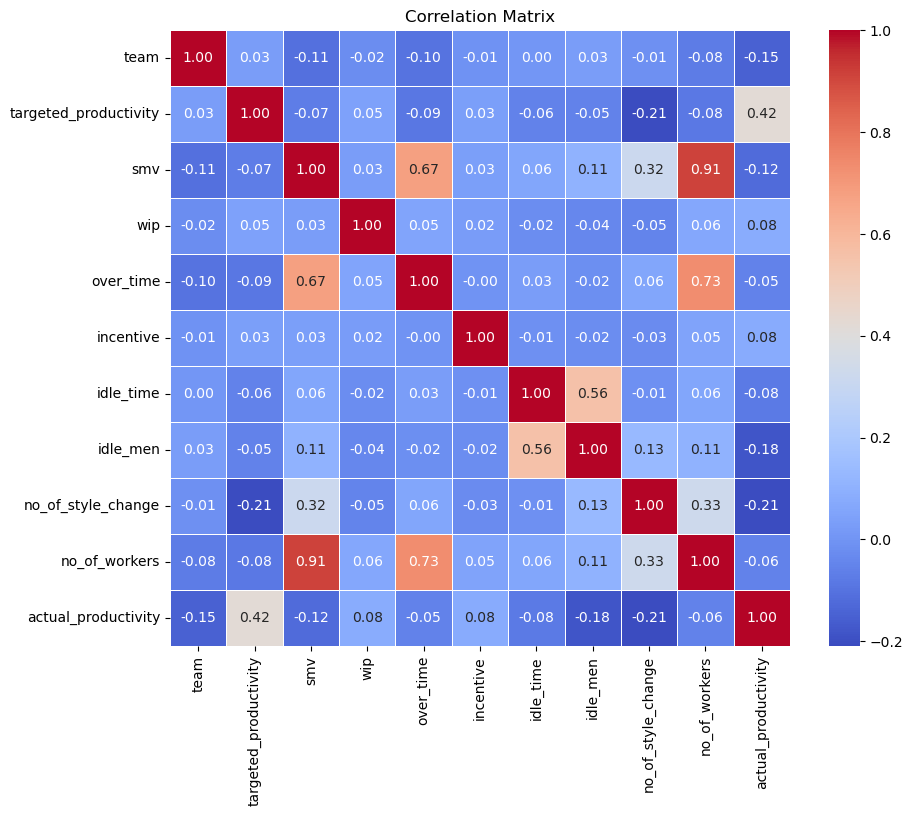

In [ ]:
# 5. Look for relationships and patterns (correlation matrix) excluding non-numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])  
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


data cleaning and data transformation: 

In [14]:
# Check the data types and missing values
df.info()

# Check how many missing values are in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [15]:
# Filling NaN values in 'wip' with the median
df['wip'] = df['wip'].fillna(df['wip'].median())


The date column from the data set is string we need to convert it date time 

In [16]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Display the updated dataframe to confirm the date conversion
df.head()  # Show the first few rows to confirm the change


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Remove outliers

In [ ]:
# Removing outliers using IQR method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outlier_thresholds = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

# Remove rows with outliers
df_cleaned = df[~((df[numeric_columns] < outlier_thresholds[0]) | (df[numeric_columns] > outlier_thresholds[1])).any(axis=1)]


In [18]:
# Define numeric columns explicitly
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Removing outliers using IQR method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outlier_thresholds = (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

# Remove rows with outliers
df_cleaned = df[~((df[numeric_columns] < outlier_thresholds[0]) | (df[numeric_columns] > outlier_thresholds[1])).any(axis=1)]


Removing unrealistic value

In [19]:
# Removing rows with unrealistic data (negative values in columns that should be positive)
df_cleaned = df_cleaned[df_cleaned['no_of_workers'] > 0]
df_cleaned = df_cleaned[df_cleaned['incentive'] >= 0]


Add new column 

In [20]:
# Adding a new column 'efficiency_ratio'
df_cleaned['efficiency_ratio'] = df_cleaned['actual_productivity'] / df_cleaned['targeted_productivity']

# Display the updated dataset with the new column
df_cleaned.head()  # Display the first few rows to confirm the new column


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,efficiency_ratio
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1.175907
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500,1.182000
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1.000713
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1.000713
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1.000477


 Data joining 

Merging two data frame 

In [ ]:
# Merging two data frames
df1 = df[['date', 'department', 'targeted_productivity']]  
df2 = df[['department', 'team', 'actual_productivity']]    

# Merge on 'department' column
df_merged = pd.merge(df1, df2, on='department', how='inner')

# Display the result
df_merged.head()


,date,department,targeted_productivity,team,actual_productivity
0,1/1/2015,sweing,0.8,8,0.940725
1,1/1/2015,sweing,0.8,11,0.800570
2,1/1/2015,sweing,0.8,12,0.800570
3,1/1/2015,sweing,0.8,6,0.800382
4,1/1/2015,sweing,0.8,7,0.800125


Joining two data frames 

In [21]:
# joining two data frames 
df1 = df[['date', 'department', 'targeted_productivity']]
df2 = df[['department', 'team', 'actual_productivity']]

# Join based on the index
df_joined = df1.join(df2, how='inner', lsuffix='_left', rsuffix='_right')

# Display the result
df_joined.head()


,date,department_left,targeted_productivity,department_right,team,actual_productivity
0,2015-01-01,sweing,0.80,sweing,8,0.940725
1,2015-01-01,finishing,0.75,finishing,1,0.886500
2,2015-01-01,sweing,0.80,sweing,11,0.800570
3,2015-01-01,sweing,0.80,sweing,12,0.800570
4,2015-01-01,sweing,0.80,sweing,6,0.800382


Concatenating two  or more dat frame 

In [22]:
# concatenating two dataor more frames
df1 = df[['date', 'department', 'targeted_productivity']]
df2 = df[['department', 'team', 'actual_productivity']]

# Concatenate vertically (stacking rows)
df_concatenated_vertically = pd.concat([df1, df2], axis=0, ignore_index=True)

# Concatenate horizontally (adding columns side by side)
df_concatenated_horizontally = pd.concat([df1, df2], axis=1)

# Display the result
df_concatenated_vertically.head(), df_concatenated_horizontally.head()
 

(        date  department  targeted_productivity  team  actual_productivity
 0 2015-01-01      sweing                   0.80   NaN                  NaN
 1 2015-01-01  finishing                    0.75   NaN                  NaN
 2 2015-01-01      sweing                   0.80   NaN                  NaN
 3 2015-01-01      sweing                   0.80   NaN                  NaN
 4 2015-01-01      sweing                   0.80   NaN                  NaN,
         date  department  targeted_productivity  department  team  \
 0 2015-01-01      sweing                   0.80      sweing     8   
 1 2015-01-01  finishing                    0.75  finishing      1   
 2 2015-01-01      sweing                   0.80      sweing    11   
 3 2015-01-01      sweing                   0.80      sweing    12   
 4 2015-01-01      sweing                   0.80      sweing     6   
 
    actual_productivity  
 0             0.940725  
 1             0.886500  
 2             0.800570  
 3             0.

Data Visualization

Quetsion : How does targeted_productivity compare to actual_productivity across different departments?"

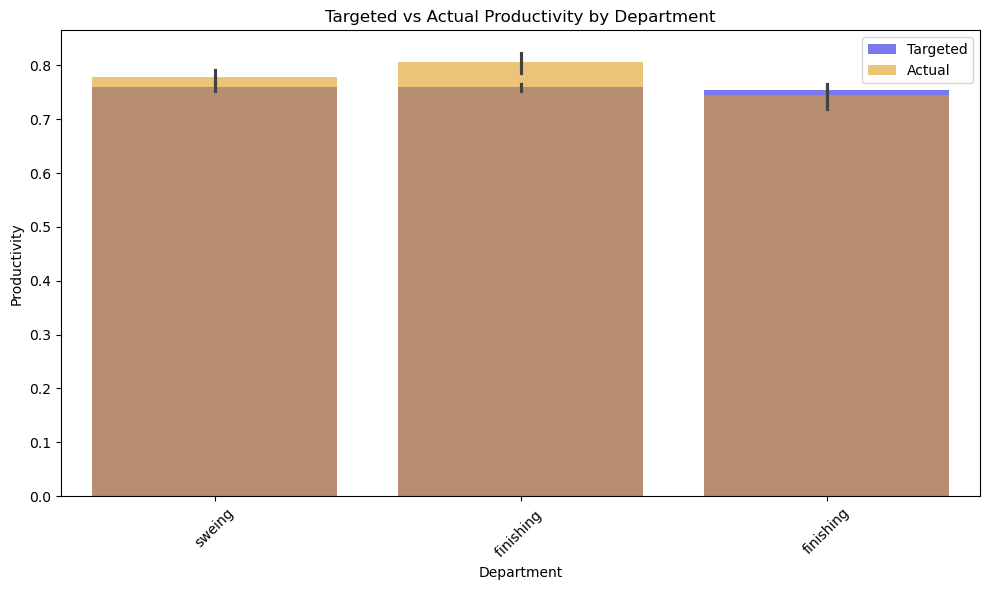

In [23]:


# Plot comparison of 'targeted_productivity' and 'actual_productivity'
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='targeted_productivity', data=df_cleaned, color='blue', alpha=0.6, label='Targeted')
sns.barplot(x='department', y='actual_productivity', data=df_cleaned, color='orange', alpha=0.6, label='Actual')

# Labels and title
plt.title('Targeted vs Actual Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Productivity')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


Modifiying graph to communicate finding 

Question 2: What is the relationship between over_time and actual_productivity?

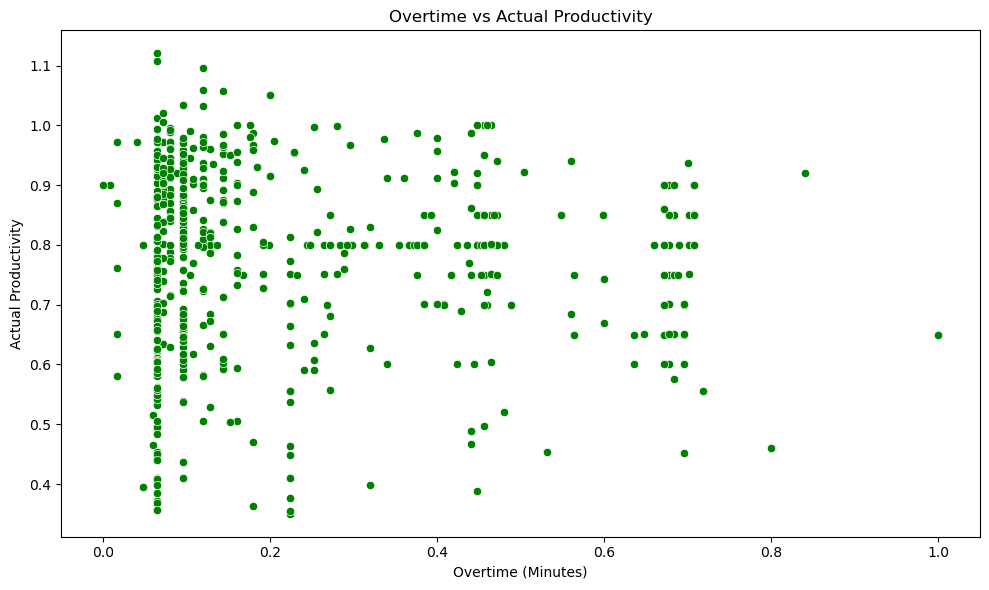

In [60]:
# Scatter plot of 'over_time' vs 'actual_productivity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='over_time', y='actual_productivity', data=df_cleaned, color='green')

# Labels and title
plt.title('Overtime vs Actual Productivity')
plt.xlabel('Overtime (Minutes)')
plt.ylabel('Actual Productivity')

# Show plot
plt.tight_layout()
plt.show()


 3 How does incentive affect actual_productivity?

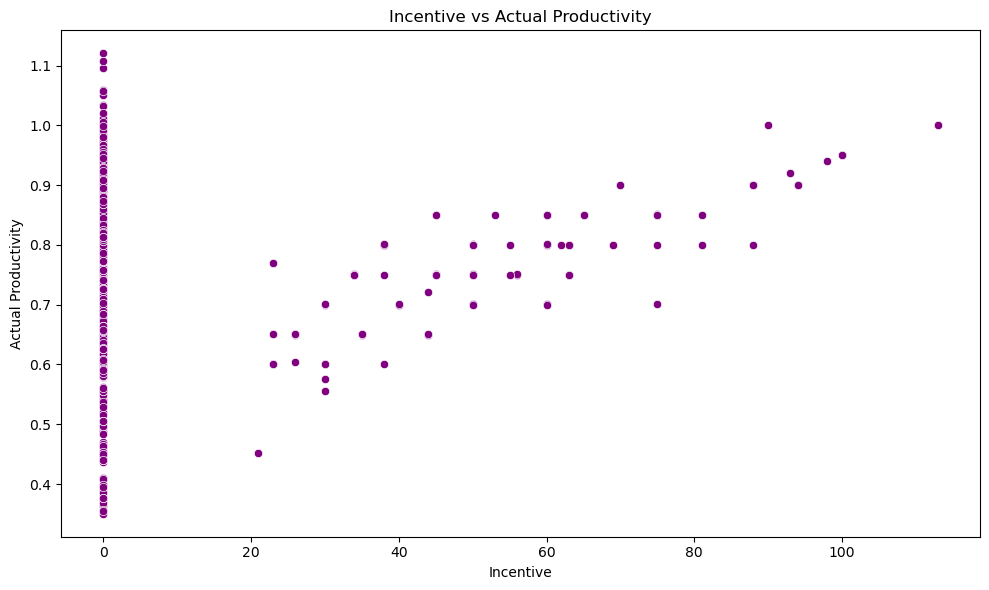

In [24]:
# Scatter plot of 'incentive' vs 'actual_productivity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='incentive', y='actual_productivity', data=df_cleaned, color='purple')

# Labels and title
plt.title('Incentive vs Actual Productivity')
plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')

# Show plot
plt.tight_layout()
plt.show()


Question 4: Which departments have the highest and lowest actual_productivity?

C:\Users\abdu\AppData\Local\Temp\ipykernel_17788\1201206722.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='actual_productivity', data=df_cleaned, palette='viridis')


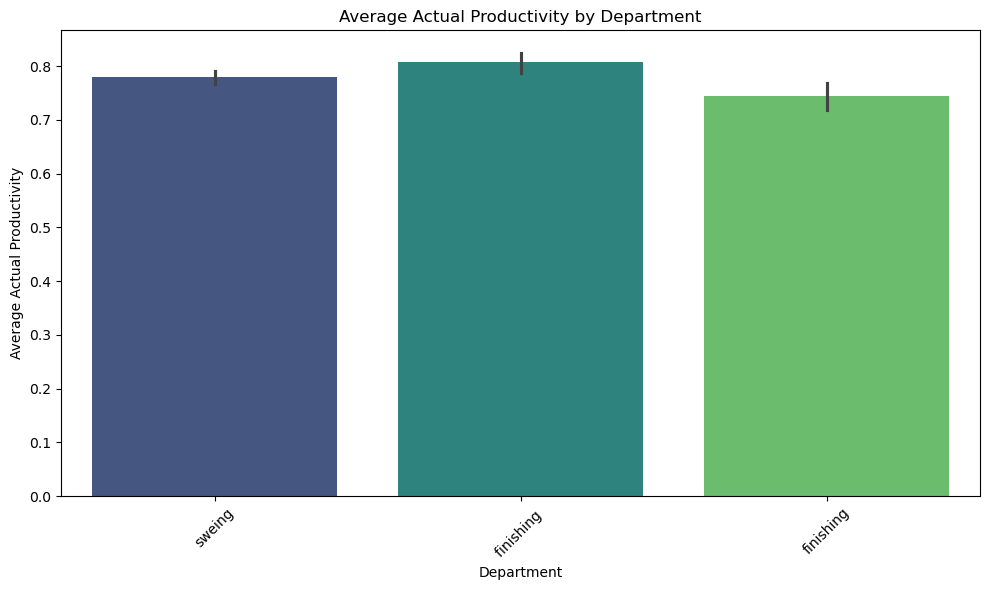

In [25]:
# visual answer 
# Bar plot for average 'actual_productivity' by department
plt.figure(figsize=(10, 6))
sns.barplot(x='department', y='actual_productivity', data=df_cleaned, palette='viridis')

# Labels and title
plt.title('Average Actual Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Average Actual Productivity')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


Question 5: Is there any trend in productivity across different quarters?

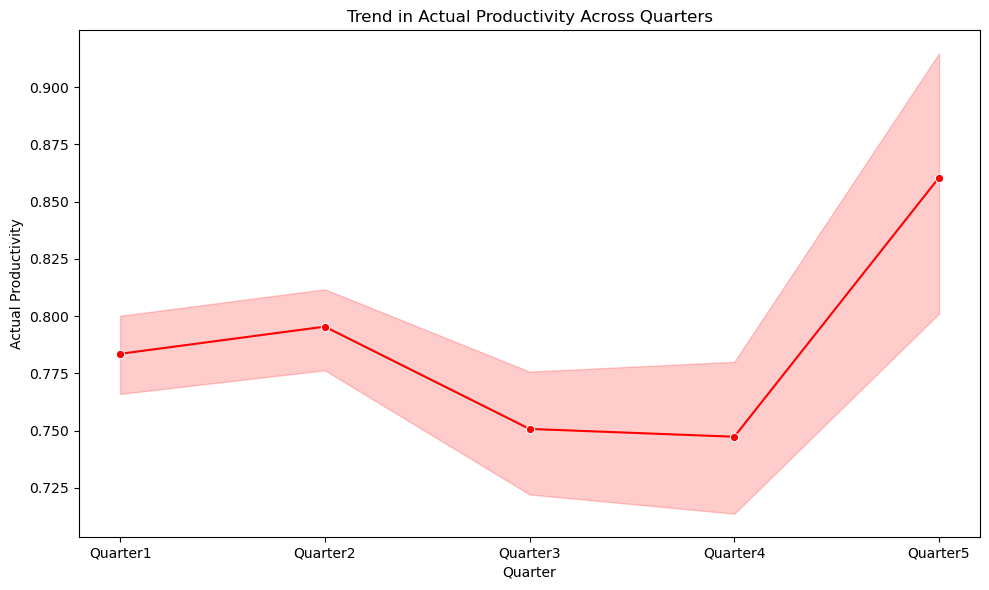

In [26]:
# visual answer 
# Line plot for trend in actual productivity across quarters
plt.figure(figsize=(10, 6))
sns.lineplot(x='quarter', y='actual_productivity', data=df_cleaned, marker='o', color='red')

# Labels and title
plt.title('Trend in Actual Productivity Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')

# Show plot
plt.tight_layout()
plt.show()


Aggregation and Grouping Operations

Perform an Aggregation on All Data: An aggregation on all data means summarizing the dataset using an aggregate function like sum(), mean(), or count(). Let's calculate the mean of all numeric columns in the dataset.

In [27]:
# Aggregation on all data: Calculate the mean for each numeric column (excluding non-numeric columns)
df_aggregated_all = df_cleaned.select_dtypes(include=['float64', 'int64']).mean()

# Display the result
df_aggregated_all


team                        6.687770
targeted_productivity       0.757698
smv                        10.208906
wip                      1043.506475
over_time                3769.561151
incentive                  18.956835
idle_time                   0.000000
idle_men                    0.000000
no_of_style_change          0.000000
no_of_workers              24.428777
actual_productivity         0.777908
efficiency_ratio            1.028480
dtype: float64

In [29]:
# Group by 'department' and calculate the mean of 'actual_productivity' and sum of 'over_time'
df_grouped = df_cleaned.groupby('department').agg({
    'actual_productivity': 'mean',
    'over_time': 'sum'
})

# Display the result
df_grouped


,actual_productivity,over_time
department,,
finishing,0.744372,390480
finishing,0.806961,483780
sweing,0.779018,1745585


Create a Pivot Table or Cross-Tabulation Table
A pivot table allows us to aggregate data and view it in a table format. 

In [30]:
# Create a pivot table: Average 'actual_productivity' by 'department' and 'quarter'
df_pivot = df_cleaned.pivot_table(values='actual_productivity', index='department', columns='quarter', aggfunc='mean')

# Display the result
df_pivot


quarter,Quarter1,Quarter2,Quarter3,Quarter4,Quarter5
department,,,,,
finishing,0.748668,0.783918,0.762806,0.664265,NaN
finishing,0.808611,0.803256,0.759380,0.807440,0.900233
sweing,0.788951,0.800264,0.734617,0.768883,0.772164


In [31]:
# Create a cross-tabulation table for 'department' and 'quarter'
df_crosstab = pd.crosstab(df_cleaned['department'], df_cleaned['quarter'])

# Display the result
df_crosstab


quarter,Quarter1,Quarter2,Quarter3,Quarter4,Quarter5
department,,,,,
finishing,67,66,34,44,0
finishing,72,54,38,50,20
sweing,97,68,46,30,9
